# Capstone project - Battle of the Neighborhood - Week 2

### Applied Data Science Capstone by IBM/Coursera

####       Original work developed by Bilal AL-Soudi 7-2-2020
####       Resident of Dubai/UAE

## Introduction: Business Problem <a name="introduction"></a>

Whether you are single or relocating to the UAE (United Arab Emirates) with your family, there are certain areas that continue to attract expats in their droves.

Capital city Abu Dhabi and its neighbor Dubai are the hotspots of the UAE for expat activity. Skyscrapers, a thriving hospitality industry, and the inner-city beaches are attractive places to reside.

**Top of the list for many families moving to a new location** is **quality schooling**, and the UAE provides high-quality education all around. Many nations have schools for their expats, and there are plenty of international schools to choose from.

**Closeness to facilities** such as recreational areas is also important. There are many areas to choose from in both cities, depending on what your family needs are. Not all residential areas are in high-rise buildings, but this might best suit you and your family.

We'll be focousing on **Abu Dhabi as its the capital of the UAE** and the second-largest city after Dubai. If you choose to live here, there are ample options and we'll demonstrate how an **XPATs can pick the neighberhood** of his/her choice based on **private school**,s **rating** and **curriculum** and of course **near by venues**. 

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed towards best possible selection of best locations.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:

- number of existing venues near by schools (any type of venues)
- number of private schools in general 
- number of private schools based on ratings i.e. Outstanding, Very Goog, Good , Acceptable, Weak, Very Weak
- number of private schools based on curriculums i.e. American , English , indian, japanies, German, Canadian..etc

Following data sources will be needed to extract/generate the required information:

- WIll be using **GEOPY python library** to generate Latitude and Longitude for the Abu Dhabi Island
- Will be using the **GEOCODER python library** to geocode coordinates (Latituded and Longitude for schools in Abu Dhabi. 
- Downloaded csv file for all Abu Dhabi localities (Neigberhoods) along with thier coordinates (Latitudes and Longitudes) 
  from https://www.geopostcodes.com/Abu_Dhabi
- Used a free handy tool**(WEBHARVY)** https://www.webharvy.com/ to srape multiple pages to get school's related ratings and curriculums to a csv file. 
- number of restaurants and their type and location in every neighborhood will be obtained using **FOURSQUARE API**  
- Write near by venues and venue's details returned via FOURSQUARE APIs to unique separate csv files. The files will read later to data \
  frames for continued testing. This is necessary since FOURSQUARE has limitation in making daily calls to their API's. 


## Methodology

In this project we will direct our efforts on detecting areas of Abu Dhabi with Private schools that have hight ratings i.e. Outstanding and Very Good which will lead to the neighborhood to be considered living in since schools fees reflects its overall ratings i.e. Outstanding and Very Good are relatively more expensive than Schools with Ratings of Good and/or Acceptable.  

We WIll cluster the Schools based on its curriculum i.e. American , English, Indian, German, Canadian, ..etc This is important since it will reflect demographic of people living in the hosted neighborhood. Here we will use the One Hot Encoding technique and using Kmeans and later show clusters on a map.

ALso will look into the venues near by the schools and will show how to manipulate the data for the purpose of plotting meaningful bar charts to be used as tools to be used in building a case in making a descision to consider a neighborhood  to live in. 

We will also calculate total venue's average rating. The cumulative average will provide more decision power for Xpats or parents towards considering the locality(Neighborhood) to live in.

## Results and Discussion <a name="results"></a>

Its important to know that the city of Abu Dhabi is really an Island and its the capitol city of the UAE. Also its the Capitol city of the Emirates of Abu Dhabi. The Emirates of Abu Dhabi is one of Seven emirates making up UAE : Dubai, Abu Dhabi, Fujaira, Ejman, Um AL Quain, Ras Al Khaima, and Sharja. 

The Island is where the government resides. Its a world class city that exercise up to date technological trends and as such attracts many professionals (XPATS) form all over globe. Those are our stakeholders who we are targeting to provide them with minimum and sufficient analysis to assist them in making a decision to pick the right neighborhood. 

ALso its important to remember that the term community/locality resembles neighborhoods. The term Bouroughs  is not used. 
    
The XPATs(Residents) will target the Private schools as oppose to public schools which is attended by the locals(citizens) and thus our analysis is centered around private schools and near by venues. This project will also focous on identifying neighborhoods where private schools resides in with rating of "Outstanding" and "Very Good". 

We first map out all the private schools in the emirates of Abu dhabi  inculuidng the island of Abu Dhabi and our first observation shows that the private schools are centered in the Island of Abu Dhabi and the city of ALAin. This indicates that XPAT that surly they will target two cities. 

Next step will focus on private schools with rating of "OutStandng" and "Very Good". So we filter the desired schools out and cluster them based on the curriculum offered by these schools. Will adopt the One Hot Encoding technique to convert the categorical values i.e. "American", "English", Indian"..etc into numerical values and then adopt the Kmeans clustreing technique to cluster the schools into three clusters. 

The top three localities (Neighberhoods) with most schools with rating of "Outstanding" and "Very Good" will be found in AlBateen, Khalifa City and Mohamed bin Zaid. This will conclude the these neighborhoods will mostly be targeted by XAPTS.

Next we pick "ALbateen" Locality since it has the most schools with ratings of outstanding/very good among the the other localities and will fetch the near by venues. We categorize them and lookup the statistics i.e. how many hospitals or restaurants (Indians, italians..etc)  

Once we get the venues , we then fetch the related venue details i.e. ratings/likes/tips. Here we will calculate the average ratings of all venues surrounding each schools in the Albateen locality. 

Finally we show all venues surrounding the ALbateen schools. 

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Abu Dhabi's most popular localities based on the private school's ratings and curriculum. ALso we factor in venues and its details surrounding these schools which will be very imperative to be considered in selecting the area/communities. This project is a corner stone for further enhancements to account for further criteria.

We applied One Heat Encoding along usage of Kneans clustring technique to cluster schools based on curriculum. The schools can be as well clustered per ratings for added value. 

In this project we spend lots of efforts and time towards compiling data via scraping and geocoding coordinates. Illustration is very important to demonstrate to Stakeholders and thus relied heavilly on making sure the schools. localities and venues latitudes and Loogitudes are available for sake mapping on maps using the folium library. 

Also demostrated bar charts to effectively show how the communities and Schools compare to each other. 

In [7]:
import sys
!{sys.executable} -m pip install geocoder
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install BeautifulSoup4
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install nbconvert


print('Packages installed.')

Packages installed.


In [8]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import geocoder # import geocoder
import requests 
from bs4 import BeautifulSoup 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim


#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Libraries imported.')

Libraries imported.


**Fetching Abu Dhabi localities names and coordinates**

In [9]:
df_abdhbi = pd.read_csv('AbuDhabiLatLong.csv')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df_abdhbi)

In [4]:
df_abdhbi.head(5)

,Locality,Latitude,Longitude
0,Abu Dhabi Airport,24.423100,54.656100
1,Abu Dhabi Gate City,24.393700,54.502100
2,Al Ain,24.223974,55.751006
3,Al Aman,24.432260,54.423530
4,Al Saadiyat beach,24.548870,54.436610


In [14]:
df_abdhbi.shape

(94, 3)

**Fetching Private schools information i.e. Names, Ratings, Curriculum**

In [15]:
df_abdhbi_school = pd.read_csv('adallschoolsrateandcurriculum.csv')
df_abdhbi_school.head(5)

,School,Address,Curriculum,Rate
0,International Academic School,Al Wathba,American,Acceptable
1,Baniyas International Private School,Baniyas East,American,Acceptable
2,Virginia International Private School,Khalifa City,American,Acceptable
3,Summit International School,Mohamed Bin Zayed City,American,Acceptable
4,Elite (Al Nukhba) Private School,Mohamed Bin Zayed City,American,Acceptable


In [16]:
df_abdhbi_school.shape

(116, 4)

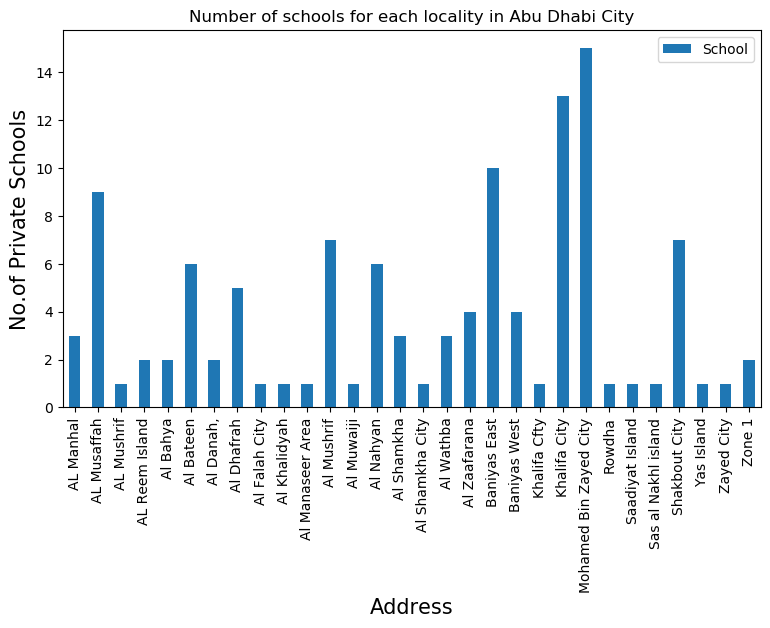

In [17]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of schools for each locality in Abu Dhabi City')
#On x-axis
plt.xlabel('Locality', fontsize = 15)
#On y-axis
plt.ylabel('No.of Private Schools', fontsize=15)
#giving a bar plot
df_abdhbi_school.groupby('Address')['School'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

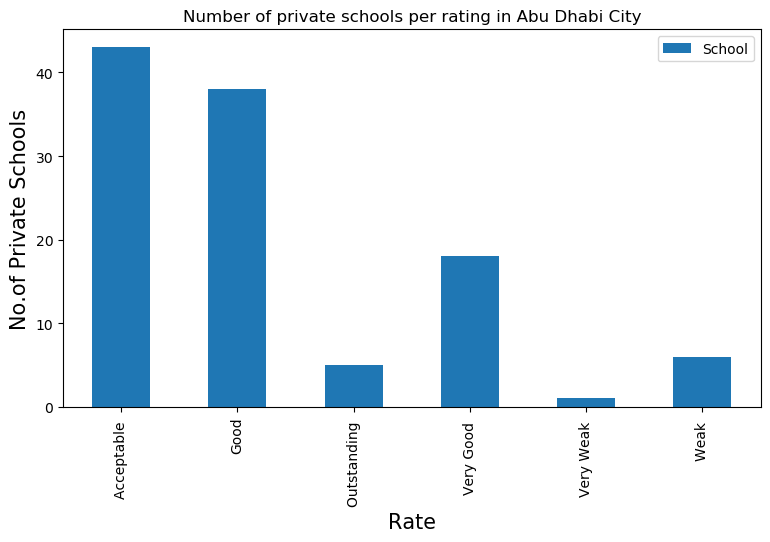

In [18]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of private schools per rating in Abu Dhabi City')
#On x-axis
plt.xlabel('Locality', fontsize = 15)
#On y-axis
plt.ylabel('No.of Private Schools', fontsize=15)
#giving a bar plot
df_abdhbi_school.groupby('Rate')['School'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

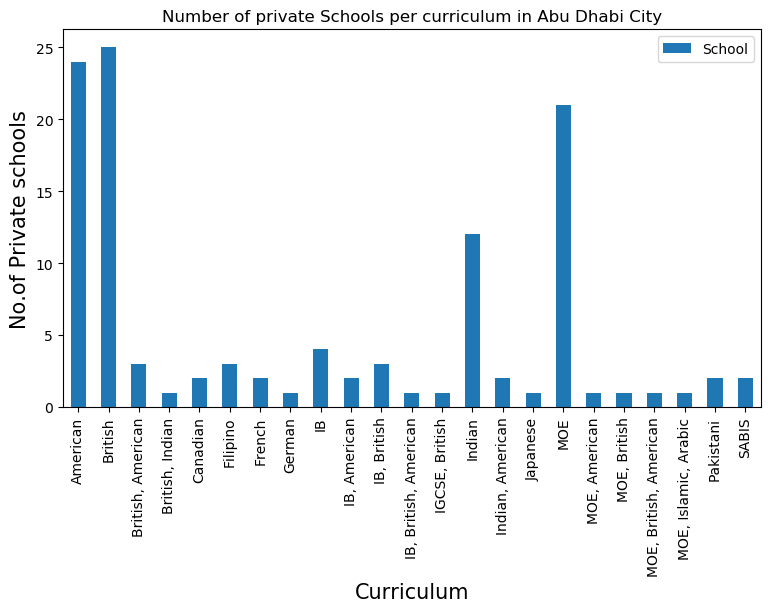

In [19]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of private Schools per curriculum in Abu Dhabi City')
#On x-axis
plt.xlabel('Locality', fontsize = 15)
#On y-axis
plt.ylabel('No.of Private schools', fontsize=15)
#giving a bar plot
df_abdhbi_school.groupby('Curriculum')['School'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

**Function to geocode the schools coordinates**
- We utilize the geocoder python library

In [20]:
# function to retrieve scools coordinates i.e. LAT and LONG
def get_latilong(school):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, abu dhabi'.format(school))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('GEMS American Academy')

[24.428770000000043, 54.56411000000003]

**Return the Latitude and Longitude for each school**

In [12]:
# Retrieving school Co-ordinates via GEOCODER library ..
Schools = df_abdhbi_school['School']    
abdhbi_school_coords = [ get_latilong(school) for school in Schools.tolist() ]

In [13]:
#Adding column lables  for generated coordinates i.e LAT and LONG
abdhbi_school_coords = pd.DataFrame(abdhbi_school_coords, columns=['Latitude', 'Longitude'])

In [14]:
abdhbi_school_coords.head(5)

,Latitude,Longitude
0,24.36407,54.63773
1,24.32334,54.63291
2,24.39082,54.65403
3,24.47879,54.36806
4,24.15696,47.33075


**Adding new columns (Latitude and Longitude) to the schools data frame**

In [15]:
#reset data farme indexes
df_abdhbi_school= df_abdhbi_school.reset_index(drop=True)
#Adding LAT and LONG columns 
df_abdhbi_school['Latitude'] = abdhbi_school_coords['Latitude']
df_abdhbi_school['Longitude'] = abdhbi_school_coords['Longitude']

In [16]:
df_abdhbi_school.head(5)

,School,Address,Curriculum,Rate,Latitude,Longitude
0,International Academic School,Al Wathba,American,Acceptable,24.36407,54.63773
1,Baniyas International Private School,Baniyas East,American,Acceptable,24.32334,54.63291
2,Virginia International Private School,Khalifa City,American,Acceptable,24.39082,54.65403
3,Summit International School,Mohamed Bin Zayed City,American,Acceptable,24.47879,54.36806
4,Elite (Al Nukhba) Private School,Mohamed Bin Zayed City,American,Acceptable,24.15696,47.33075


**Writing data frame into CSV files for safe keeping**

In [25]:
df_abdhbi_school.to_csv('df_abdhbi_school_with_coords.csv', index=False)

Reading data frame into CSV file and veryfying data

In [21]:
#Reading data frame into CSV file and veryfying data
df_abdhbi_school=pd.read_csv('df_abdhbi_school_with_coords.csv')
df_abdhbi_school.shape

(116, 6)

**Using the GEOPY python library to get Latitude and Longitude for ABU DHABI Island**

In [22]:
# I am using the geopy library to obtain the lat and long for ABU Dhabi Island
address = 'abu dhabi island'

geolocator = Nominatim(user_agent="capstone")
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Neighborhood_1 are 24.4747961, 54.3705762.


**Mapping out Abu Dhabi communities along with Abu Dhabi Schools**

In [49]:
# Showing schools with Outstanding and Very good in Abu Dhabi island Locaity
map_AbuDhabi = folium.Map(location=[latitude_x, longitude_y], zoom_start=9)

# add markers to map "Loclities"
for lat, lng, neighborhood in zip(df_abdhbi['Latitude'], 
                                  df_abdhbi['Longitude'],
                                  df_abdhbi['Locality']):     
    label_text = neighborhood
    label = folium.Popup(label_text, parse_html=True)
    #print(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_AbuDhabi)  
    
# add markers to map "Private schools"
for lat, lng, name in zip(df_abdhbi_school['Latitude'], 
                            df_abdhbi_school['Longitude'],
                            df_abdhbi_school['School']):     
    label_text = name
    label = folium.Popup(label_text, parse_html=True)
    #print(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_AbuDhabi)  
map_AbuDhabi

**Filtering the Schools with rating Outstandig and Very Good**

In [24]:
df_abdhbi_school_outstanding_VG = df_abdhbi_school[df_abdhbi_school['Rate'].isin(['Outstanding ', 'Very Good ']) ]
df_abdhbi_school_outstanding_VG.reset_index(drop=True)

,School,Address,Curriculum,Rate,Latitude,Longitude
0,Sheikh Zayed Private Academy for Girls,Al Bateen,American,Very Good,24.46471,54.35064
1,American Community School,Al Bateen,American,Very Good,24.46498,54.34085
2,The Sheikh Zayed Private Academy for Boys,Al Khalidyah,American,Very Good,24.46471,54.35064
3,American International School,AL Reem Island,American,Very Good,24.43038,54.43085
4,"Horizon Private School- Branch, Khalifa City",Khalifa City,American,Very Good,24.42008,54.59828
5,Emirates National School,Mohamed Bin Zayed City,American,Very Good,24.47616,54.38255
6,International School,Mohamed Bin Zayed City,American,Very Good,24.09903,55.83098
7,Al Muna Academy - Aldar Academies,Al Bateen,British,Outstanding,24.47488,54.37598
8,Al Basma British School,Al Dhafrah,British,Very Good,24.18700,55.62789
9,"Aldar Academies, The Pearl Academy",Al Dhafrah,British,Very Good,24.47488,54.37598


**Writing data frame into CSV files for safe keeping**

In [25]:
df_abdhbi_school_outstanding_VG.to_csv('df_abdhbi_school_outstanding.csv', index=False)

**drop rown wih NAN values (Good practice)**

In [26]:
df_abdhbi_school_outstanding_VG = df_abdhbi_school_outstanding_VG[df_abdhbi_school_outstanding_VG['School'].notna()]
df_abdhbi_school_outstanding_VG.shape

(23, 6)

**Projecting the schools with Outstanding and Very good in Abu Dhabi island Locaity**
- Blue markers --> Abu Dhabi island and srrounding Abu Dhabi main land Localities (Naigberhoods)
- Red markers --> Abdu Dhabi outstanding and very Good rating schools

In [27]:
# Showing schools with Outstanding and Very good in Abu Dhabi island Locaity
map_AbuDhabi = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# add markers to map "Loclities"
for lat, lng, neighborhood in zip(df_abdhbi['Latitude'], 
                                  df_abdhbi['Longitude'],
                                  df_abdhbi['Locality']):     
    label_text = neighborhood
    label = folium.Popup(label_text, parse_html=True)
    #print(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_AbuDhabi)  
    
# add markers to map "Private schools"
for lat, lng, name in zip(df_abdhbi_school_outstanding_VG['Latitude'], 
                            df_abdhbi_school_outstanding_VG['Longitude'],
                            df_abdhbi_school_outstanding_VG['School']):     
    label_text = name
    label = folium.Popup(label_text, parse_html=True)
    #print(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_AbuDhabi)  
map_AbuDhabi

## Applying the OneHot Encoding

Applying a machine learning technique to allow clustring the data 

**- Converting the Curriculum categorical data into Numerical data**

In [28]:
Feature = pd.get_dummies(df_abdhbi_school_outstanding_VG[['Curriculum']], prefix="", prefix_sep="")
Feature.shape

(23, 9)

In [29]:
# add neighborhood column back to dataframe
Feature['School'] = df_abdhbi_school_outstanding_VG['School'] 


**- Group the numerical data. We get 22 rows(groups). These are number of private schools**

In [30]:
# move neighborhood column to the first column
fixed_columns = [Feature.columns[-1]] + list(Feature.columns[:-1])
Feature = Feature[fixed_columns]
df_abdhbi_school_grouped = Feature.groupby('School').mean().reset_index()

In [31]:
df_abdhbi_school_grouped

,School,American,British,French,German,IB,"IB, American","IB, British",Indian,Japanese
0,International School,1,0,0,0,0,0,0,0,0
1,Al Basma British School,0,1,0,0,0,0,0,0,0
2,Al Muna Academy - Aldar Academies,0,1,0,0,0,0,0,0,0
3,"Aldar Academies, Al Yasmina Academy",0,1,0,0,0,0,0,0,0
4,"Aldar Academies, The Pearl Academy",0,1,0,0,0,0,0,0,0
5,American Community School,1,0,0,0,0,0,0,0,0
6,American International School,1,0,0,0,0,0,0,0,0
7,British International School,0,0,0,0,0,0,1,0,0
8,British School Al Khubairat,0,1,0,0,0,0,0,0,0
9,Cranleigh School,0,1,0,0,0,0,0,0,0


In [32]:
df_abdhbi_school_grouped.shape

(23, 10)

**- Cluster the data (curriculum) into 3 clusters 0,1,2. The output is 23 lables(Outstanding/VG Schools) that matches the number of groups**

In [33]:
# Using K-Means to cluster neighborhood into 3 clusters
df_abdhbi_school_clustering = df_abdhbi_school_grouped.drop('School', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_abdhbi_school_clustering)
kmeans.labels_

array([2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2,
       2], dtype=int32)

In [34]:
df_abdhbi_school_outstanding_VG= df_abdhbi_school_outstanding_VG.reset_index(drop=True)

In [35]:
# merge abu dhabi_grouped with abdu dhabi data to add latitude/longitude for each neighborhood
df_abdhbi_school_merged = df_abdhbi_school_outstanding_VG
df_abdhbi_school_merged = df_abdhbi_school_merged.join(df_abdhbi_school_grouped.set_index('School'), on='School')

In [35]:
df_abdhbi_school_merged

,School,Address,Curriculum,Rate,Latitude,Longitude,American,British,French,German,IB,"IB, American","IB, British",Indian,Japanese
0,Sheikh Zayed Private Academy for Girls,Al Bateen,American,Very Good,24.46471,54.35064,1,0,0,0,0,0,0,0,0
1,American Community School,Al Bateen,American,Very Good,24.46498,54.34085,1,0,0,0,0,0,0,0,0
2,The Sheikh Zayed Private Academy for Boys,Al Khalidyah,American,Very Good,24.46471,54.35064,1,0,0,0,0,0,0,0,0
3,American International School,AL Reem Island,American,Very Good,24.43038,54.43085,1,0,0,0,0,0,0,0,0
4,"Horizon Private School- Branch, Khalifa City",Khalifa City,American,Very Good,24.42008,54.59828,1,0,0,0,0,0,0,0,0
5,Emirates National School,Mohamed Bin Zayed City,American,Very Good,24.47616,54.38255,1,0,0,0,0,0,0,0,0
6,International School,Mohamed Bin Zayed City,American,Very Good,24.09903,55.83098,1,0,0,0,0,0,0,0,0
7,Al Muna Academy - Aldar Academies,Al Bateen,British,Outstanding,24.47488,54.37598,0,1,0,0,0,0,0,0,0
8,Al Basma British School,Al Dhafrah,British,Very Good,24.18700,55.62789,0,1,0,0,0,0,0,0,0
9,"Aldar Academies, The Pearl Academy",Al Dhafrah,British,Very Good,24.47488,54.37598,0,1,0,0,0,0,0,0,0


In [36]:
del df_abdhbi_school_merged['Curriculum']
del df_abdhbi_school_merged['Rate']

In [37]:
df_abdhbi_school_merged.head(5)

,School,Address,Latitude,Longitude,American,British,French,German,IB,"IB, American","IB, British",Indian,Japanese
0,Sheikh Zayed Private Academy for Girls,Al Bateen,24.46471,54.35064,1,0,0,0,0,0,0,0,0
1,American Community School,Al Bateen,24.46498,54.34085,1,0,0,0,0,0,0,0,0
2,The Sheikh Zayed Private Academy for Boys,Al Khalidyah,24.46471,54.35064,1,0,0,0,0,0,0,0,0
3,American International School,AL Reem Island,24.43038,54.43085,1,0,0,0,0,0,0,0,0
4,"Horizon Private School- Branch, Khalifa City",Khalifa City,24.42008,54.59828,1,0,0,0,0,0,0,0,0


**Add Clusters lables**

In [36]:
df_abdhbi_school_merged.insert(0, 'Cluster Labels', kmeans.labels_)

In [37]:
df_abdhbi_school_merged

,Cluster Labels,School,Address,Curriculum,Rate,Latitude,Longitude,American,British,French,German,IB,"IB, American","IB, British",Indian,Japanese
0,2,Sheikh Zayed Private Academy for Girls,Al Bateen,American,Very Good,24.46471,54.35064,1,0,0,0,0,0,0,0,0
1,1,American Community School,Al Bateen,American,Very Good,24.46498,54.34085,1,0,0,0,0,0,0,0,0
2,1,The Sheikh Zayed Private Academy for Boys,Al Khalidyah,American,Very Good,24.46471,54.35064,1,0,0,0,0,0,0,0,0
3,1,American International School,AL Reem Island,American,Very Good,24.43038,54.43085,1,0,0,0,0,0,0,0,0
4,1,"Horizon Private School- Branch, Khalifa City",Khalifa City,American,Very Good,24.42008,54.59828,1,0,0,0,0,0,0,0,0
5,2,Emirates National School,Mohamed Bin Zayed City,American,Very Good,24.47616,54.38255,1,0,0,0,0,0,0,0,0
6,2,International School,Mohamed Bin Zayed City,American,Very Good,24.09903,55.83098,1,0,0,0,0,0,0,0,0
7,0,Al Muna Academy - Aldar Academies,Al Bateen,British,Outstanding,24.47488,54.37598,0,1,0,0,0,0,0,0,0
8,1,Al Basma British School,Al Dhafrah,British,Very Good,24.18700,55.62789,0,1,0,0,0,0,0,0,0
9,1,"Aldar Academies, The Pearl Academy",Al Dhafrah,British,Very Good,24.47488,54.37598,0,1,0,0,0,0,0,0,0


**Showing Outstanding/very good schools  clustered by its curriculum on Abu Dhabi islnad**

In [38]:
# create map
kclusters = 3
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_abdhbi_school_merged['Latitude'], df_abdhbi_school_merged['Longitude'], df_abdhbi_school_merged['School'], df_abdhbi_school_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Function to get venues**

In [50]:
#Function to get the id , name, category , and latitude and longitude for for each venue 
def getNearbyVenues(names, naigberhoods, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, naighberhood, lat, lng in zip(names, naigberhoods,latitudes, longitudes):
        print(name,' ',naighberhood)
        
        #set variables
        radius=1000
        LIMIT=100
        CLIENT_ID = 'ZKDGK14HFNPEYFQLZGZNFUE43KVETJIR4IZ4ISGPTCFNL5P3' # changed my Foursquare ID
        CLIENT_SECRET = 'WDOKOSEMSBQSZPFBMDR1QEJHJ2BFG4MOUY43N2HGABM4XRF1' # changed Foursquare Secret
        VERSION = '20180604' # Foursquare API version 
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            naighberhood,
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['School', 
                  'School Latitude', 
                  'School Longitude', 
                  'Naighberhood',
                  'Venue ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']         
     
    return(nearby_venues)

**Function to get venues details i.e Rates, Likes , Tips for the venues**

In [51]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'ZKDGK14HFNPEYFQLZGZNFUE43KVETJIR4IZ4ISGPTCFNL5P3' # i have changed the id with ##
    CLIENT_SECRET = 'WDOKOSEMSBQSZPFBMDR1QEJHJ2BFG4MOUY43N2HGABM4XRF1' # i have changed the secret with ##
    VERSION = '20180604' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

**Get Venues near by schools**

In [123]:
#make the call to the getvenues function
abudhabi_venues = getNearbyVenues(names=df_abdhbi_school_outstanding_VG['School'],
                                  naigberhoods=df_abdhbi_school_merged['Address'],
                                   latitudes=df_abdhbi_school_outstanding_VG['Latitude'],
                                   longitudes=df_abdhbi_school_outstanding_VG['Longitude']
                                  )

Sheikh Zayed Private Academy for Girls   Al Bateen
American Community School   Al Bateen
The Sheikh Zayed Private Academy for Boys   Al Khalidyah
American International School   AL Reem Island
Horizon Private School- Branch, Khalifa City   Khalifa City
Emirates National School   Mohamed Bin Zayed City
 International School   Mohamed Bin Zayed City
Al Muna Academy - Aldar Academies   Al Bateen
Al Basma British School   Al Dhafrah
Aldar Academies, The Pearl Academy   Al Dhafrah
Merryland International School   AL Musaffah
British School Al Khubairat   AL Mushrif
Repton School    AL Reem Island
Aldar Academies, Al Yasmina Academy   Khalifa Cfty
Cranleigh  School   Saadiyat Island
Lycee Louis Massignon   Zone 1
German International School    AL Manhal
GEMS World Academy   Al Danah,
Raha International School   Khalifa City
GEMS American Academy   Khalifa City
British International School   Zayed City
Private International English School   Mohamed Bin Zayed City
Japanese Private School   Al 

In [67]:
abudhabi_venues.head(5)

,School,School Latitude,School Longitude,Naighberhood,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sheikh Zayed Private Academy for Girls,24.46471,54.35064,Al Bateen,4cebe003678aa09391f4faea,Al Afiya Bath & Saloon,24.468989,54.346904,Spa
1,Sheikh Zayed Private Academy for Girls,24.46471,54.35064,Al Bateen,53ff53b9498ef90189445fe5,Art House Cafe,24.460580,54.348782,Café
2,Sheikh Zayed Private Academy for Girls,24.46471,54.35064,Al Bateen,593db4fb1c0b3415effa643c,Qasmieh Al Fawal,24.472018,54.347444,Middle Eastern Restaurant
3,Sheikh Zayed Private Academy for Girls,24.46471,54.35064,Al Bateen,50042c06e4b000091039f966,The Living Room Cafe,24.469276,54.349370,Café
4,Sheikh Zayed Private Academy for Girls,24.46471,54.35064,Al Bateen,5ce051d8b9ac38002c742988,Cartel Coffee Roasters,24.458170,54.356326,Coffee Shop


In [66]:
abudhabi_venues.shape

(912, 9)

In [126]:
abudhabi_venues.to_csv('OutstandVG_School_venu.csv', index=False)

**Read venues files (conserve on API calls to FOURSQUARE)**

In [39]:
abudhabi_venues=pd.read_csv('OutstandVG_School_venu.csv')

**plot venue categories statistics**

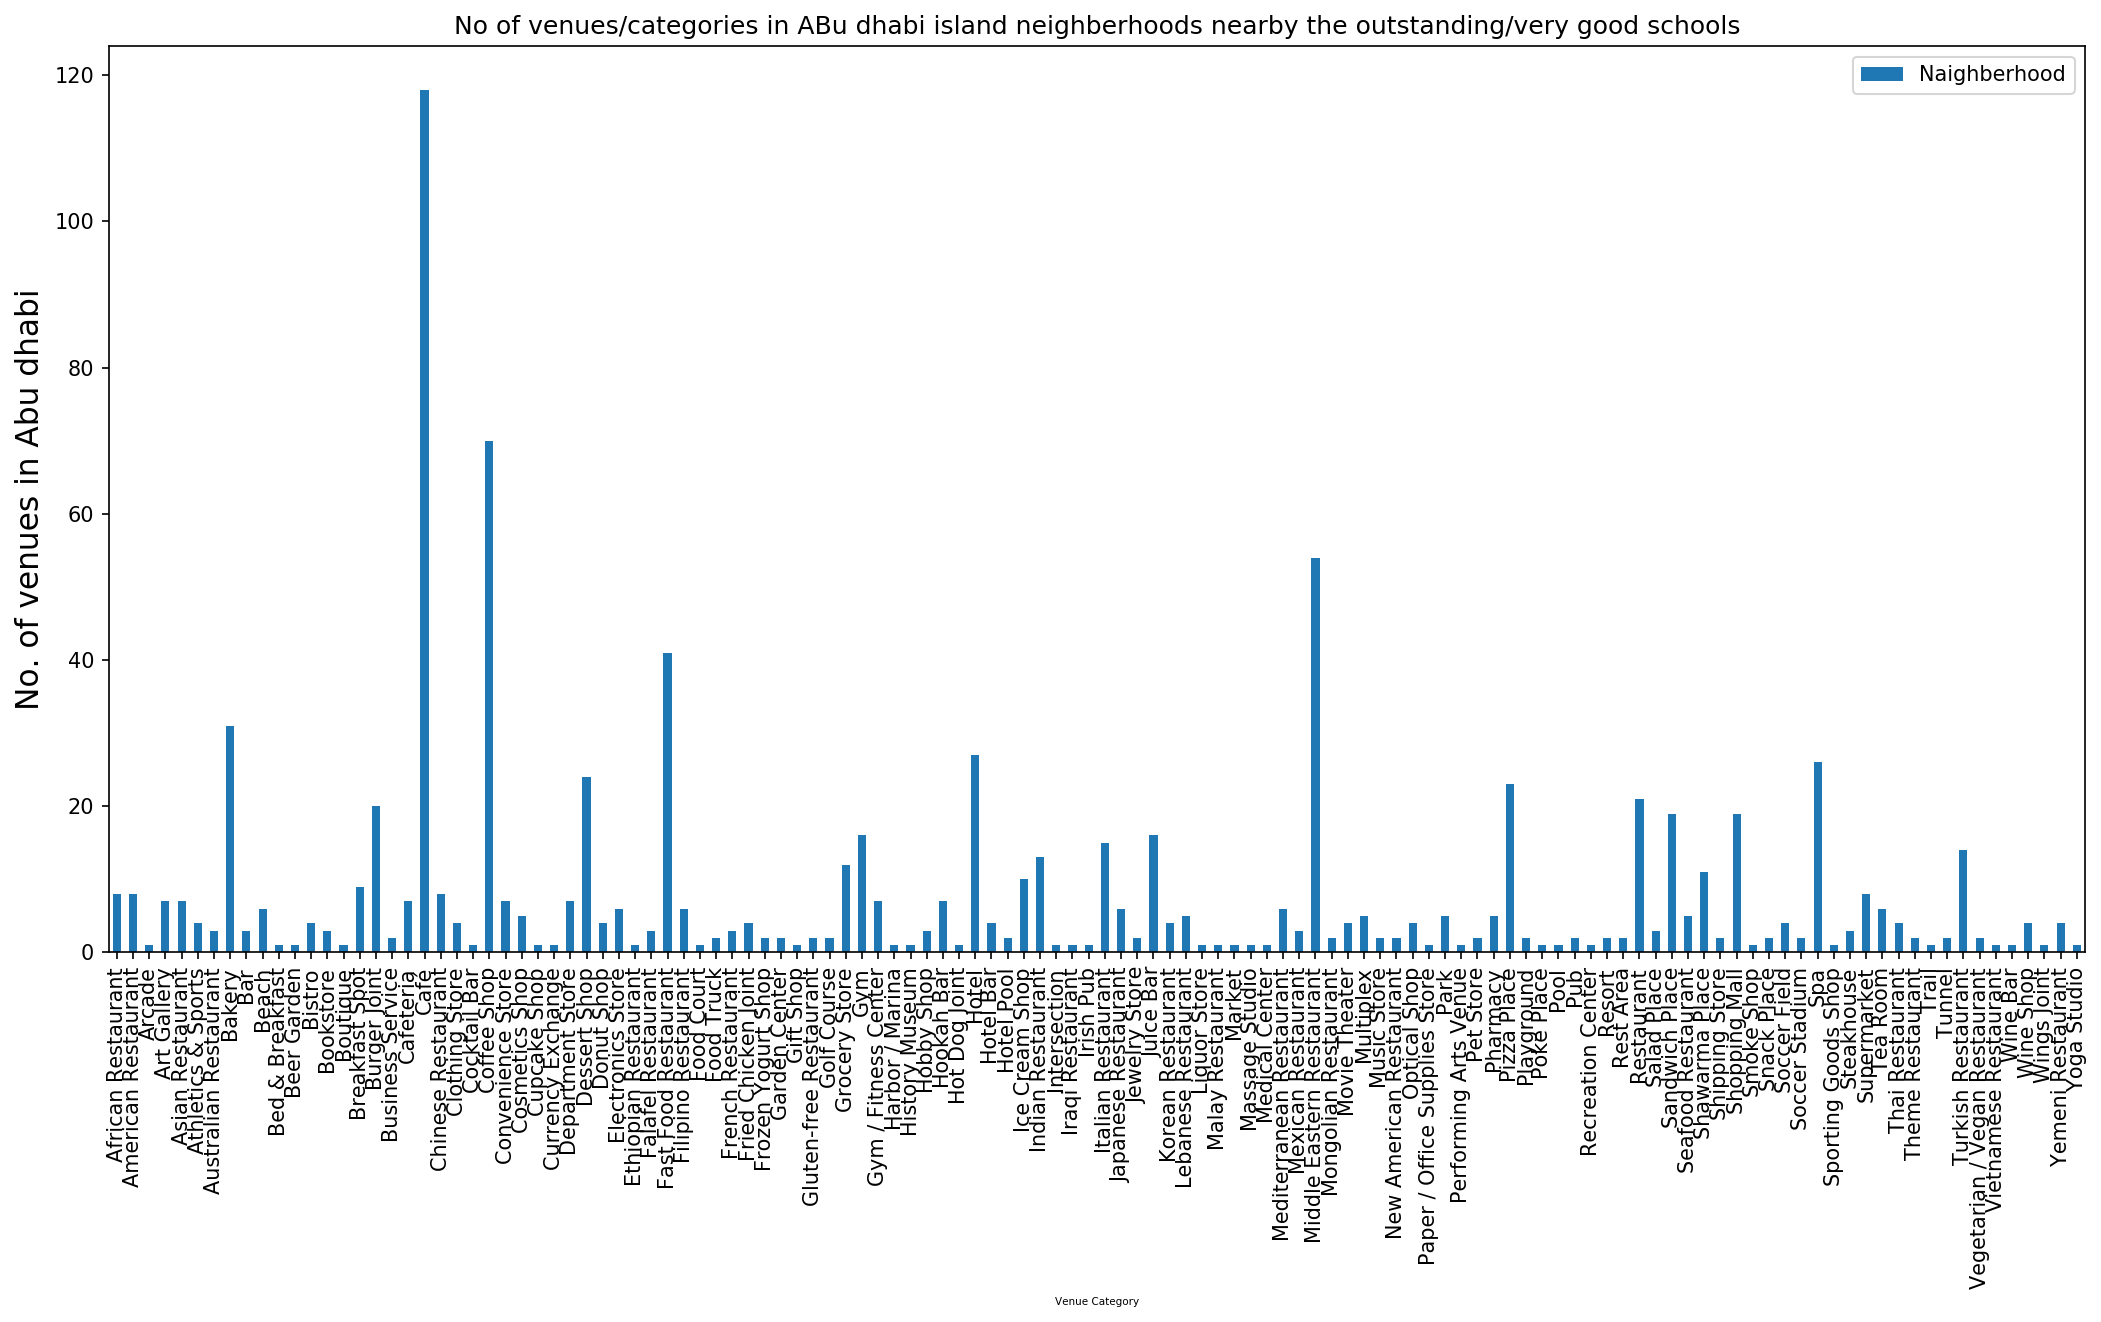

In [40]:
#Plot the venue categories in ALbateen neighberhood near by the designated outstanding/very good rated schools
plt.figure(figsize=(17,8), dpi = 150)
# title
plt.title('No of venues/categories in ABu dhabi island neighberhoods nearby the outstanding/very good schools')
#On x-axis
plt.xlabel('Category', fontsize = 5)
#On y-axis
plt.ylabel('No. of venues in Abu dhabi', fontsize=15)
#giving a bar plot
abudhabi_venues.groupby('Venue Category')['Naighberhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

**Printing report style showing categories statistics for near by venues**

**Listing all near by venues groups with totals per category per school (Outstamd/Very Good) in Abu Dhabi island**

In [41]:
# printing aall venues per categories nearby designated schools
ADSchoolsNearByVenuesGrp=abudhabi_venues.groupby('School')['Venue Category'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(ADSchoolsNearByVenuesGrp)

School                                        Venue Category               
 International School                         Café                              1
Al Basma British School                       Fast Food Restaurant              2
                                              Ice Cream Shop                    1
                                              Market                            1
                                              Middle Eastern Restaurant         1
                                              Pizza Place                       1
                                              Restaurant                        1
Al Muna Academy - Aldar Academies             Café                             12
                                              Middle Eastern Restaurant         9
                                              Coffee Shop                       7
                                              Hotel                             5
                      

**Plot Number of Outstnding and Very Good private Schools per locality in Abu Dhabi City**

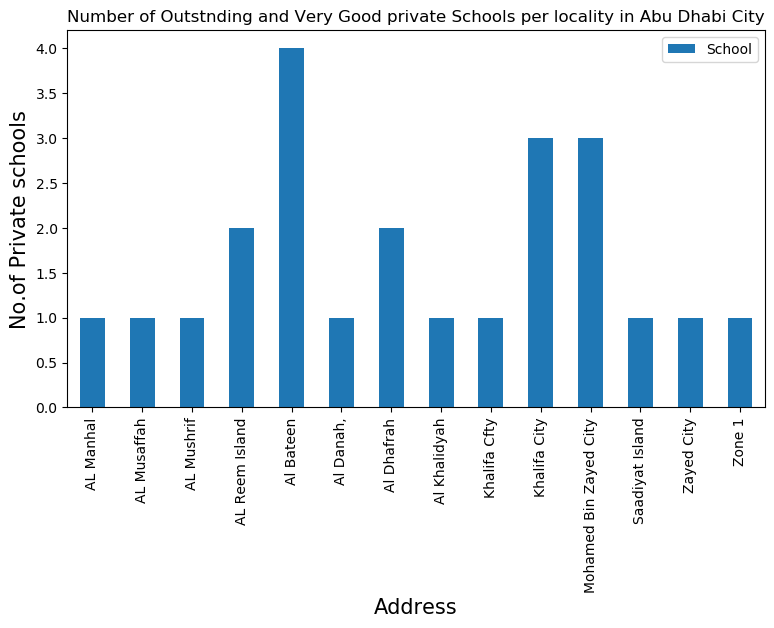

In [41]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Outstnding and Very Good private Schools per locality in Abu Dhabi City')
#On x-axis
plt.xlabel('Locality', fontsize = 15)
#On y-axis
plt.ylabel('No.of Private schools', fontsize=15)
#giving a bar plot
df_abdhbi_school_outstanding_VG.groupby('Address')['School'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

**Albateen community has the highest numbers of schools with rating of Outstanding /Very Good**

In [42]:
albateen_venues = abudhabi_venues[abudhabi_venues['Naighberhood'].isin(['Al Bateen']) ]

In [43]:
albateen_venues.reset_index(drop=True)

,School,School Latitude,School Longitude,Naighberhood,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sheikh Zayed Private Academy for Girls,24.46471,54.35064,Al Bateen,4cebe003678aa09391f4faea,Al Afiya Bath & Saloon,24.468989,54.346904,Spa
1,Sheikh Zayed Private Academy for Girls,24.46471,54.35064,Al Bateen,53ff53b9498ef90189445fe5,Art House Cafe,24.460580,54.348782,Café
2,Sheikh Zayed Private Academy for Girls,24.46471,54.35064,Al Bateen,593db4fb1c0b3415effa643c,Qasmieh Al Fawal,24.472018,54.347444,Middle Eastern Restaurant
3,Sheikh Zayed Private Academy for Girls,24.46471,54.35064,Al Bateen,50042c06e4b000091039f966,The Living Room Cafe,24.469276,54.349370,Café
4,Sheikh Zayed Private Academy for Girls,24.46471,54.35064,Al Bateen,5ce051d8b9ac38002c742988,Cartel Coffee Roasters,24.458170,54.356326,Coffee Shop
...,...,...,...,...,...,...,...,...,...
247,Japanese Private School,24.45636,54.34375,Al Bateen,4d15ec0981cea35d9995ddec,"Royal Spanish Center Lasik, Eyes, Cosmetic",24.461767,54.348339,Optical Shop
248,Japanese Private School,24.45636,54.34375,Al Bateen,4d58deca24466ea88636719f,Al Bateen Mall,24.460422,54.347736,Shopping Mall
249,Japanese Private School,24.45636,54.34375,Al Bateen,5a996e4183e38018d931a854,SADDLE,24.453539,54.340097,Coffee Shop
250,Japanese Private School,24.45636,54.34375,Al Bateen,4c19d531834e2d7fa7022b80,"Regus - Abu Dhabi, Al Bateen C6",24.456307,54.338587,Business Service


In [48]:
albateen_venues.to_csv('albateen_venues.csv', index=False)

**Get Albateen community Venues details i.e rate, likes,tips**

In [52]:
# Get detais i.e rate, likes,tips  for venues 
column_names=['School','SchoolLatitude','SchoolLongitude','Naighberhood','VenueID','Venue','VenueLatitude','VenueLongitude','VenueCategory','Likes','Rating','Tips']
albateen_venue_det=pd.DataFrame(columns=column_names)
count=1

for row in albateen_venues.values.tolist():
    
    School,SchoolLatitude,SchoolLongitude,Naighberhood,VenueID,Venue,VenueLatitude,VenueLongitude,VenueCategory=row
    
    try:
        venue_details=get_venue_details(VenueID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',VenueID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(albateen_venues),')','processed')
    albateen_venue_det = albateen_venue_det.append({'School': School,
                                                'Neighborhood': Naighberhood, 
                                                'VenueID': VenueID,
                                                'VenueName' : name,
                                                'VenueLatitude' : VenueLatitude,
                                                'VenueLongitude' : VenueLongitude,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                    Name  Likes  Rating  Tips
0  4cebe003678aa09391f4faea  Al Afiya Bath & Saloon     18     8.5     4
( 1 / 252 ) processed
                         ID            Name  Likes  Rating  Tips
0  53ff53b9498ef90189445fe5  Art House Cafe     32     7.6     7
( 2 / 252 ) processed
                         ID              Name  Likes  Rating  Tips
0  593db4fb1c0b3415effa643c  Qasmieh Al Fawal      9     8.6     4
( 3 / 252 ) processed
                         ID                  Name  Likes  Rating  Tips
0  50042c06e4b000091039f966  The Living Room Cafe     28     7.5     9
( 4 / 252 ) processed
                         ID                    Name  Likes  Rating  Tips
0  5ce051d8b9ac38002c742988  Cartel Coffee Roasters     12     8.6     6
( 5 / 252 ) processed
                         ID                 Name  Likes  Rating  Tips
0  4e19d7ee6284ea724705d032  Royal Tea ملك الشاي      9     8.2     5
( 6 / 252 ) processed
                         ID   

KeyError: 'venue'

**Writing the ALbateen venues details (Once)to file to conserve on API calls to FOURSQUARE**

In [98]:
#albateen_venue_det.to_csv('albateen_venues_details.csv', index=False)

In [44]:
albateen_venue_det=pd.read_csv('albateen_venues_details.csv')
del albateen_venue_det['SchoolLatitude']
del albateen_venue_det['SchoolLongitude']
del albateen_venue_det['Venue']
del albateen_venue_det['Naighberhood']
del albateen_venue_det['VenueCategory']
albateen_venue_det.head(5)

,School,VenueID,VenueLatitude,VenueLongitude,Likes,Rating,Tips,Neighborhood,VenueName
0,Sheikh Zayed Private Academy for Girls,4cebe003678aa09391f4faea,24.468989,54.346904,18,8.5,4,Al Bateen,Al Afiya Bath & Saloon
1,Sheikh Zayed Private Academy for Girls,53ff53b9498ef90189445fe5,24.460580,54.348782,32,7.6,7,Al Bateen,Art House Cafe
2,Sheikh Zayed Private Academy for Girls,593db4fb1c0b3415effa643c,24.472018,54.347444,9,8.6,4,Al Bateen,Qasmieh Al Fawal
3,Sheikh Zayed Private Academy for Girls,50042c06e4b000091039f966,24.469276,54.349370,28,7.5,9,Al Bateen,The Living Room Cafe
4,Sheikh Zayed Private Academy for Girls,5ce051d8b9ac38002c742988,24.458170,54.356326,12,8.6,6,Al Bateen,Cartel Coffee Roasters


In [54]:
albateen_venue_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   School          252 non-null    object 
 1   VenueID         252 non-null    object 
 2   VenueLatitude   252 non-null    float64
 3   VenueLongitude  252 non-null    float64
 4   Likes           252 non-null    int64  
 5   Rating          252 non-null    float64
 6   Tips            252 non-null    int64  
 7   Neighborhood    252 non-null    object 
 8   VenueName       252 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 17.8+ KB


**Convert objects Likes and Tips to floats too be able to calculate average values.**

In [55]:
albateen_venue_det['Likes']=albateen_venue_det['Likes'].astype('float64')
albateen_venue_det['Tips']=albateen_venue_det['Tips'].astype('float64')

In [56]:
albateen_venue_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   School          252 non-null    object 
 1   VenueID         252 non-null    object 
 2   VenueLatitude   252 non-null    float64
 3   VenueLongitude  252 non-null    float64
 4   Likes           252 non-null    float64
 5   Rating          252 non-null    float64
 6   Tips            252 non-null    float64
 7   Neighborhood    252 non-null    object 
 8   VenueName       252 non-null    object 
dtypes: float64(5), object(4)
memory usage: 17.8+ KB


**Venue with the highest Likes**

In [57]:
#The venue with the Highest Likes
albateen_venue_det.iloc[albateen_venue_det['Likes'].idxmax()]

School            Al Muna Academy - Aldar Academies
VenueID                    4b77f3f3f964a520f3af2ee3
VenueLatitude                               24.4704
VenueLongitude                               54.373
Likes                                           996
Rating                                          7.8
Tips                                            140
Neighborhood                              Al Bateen
VenueName                Al Wahda Mall (الوحدة مول)
Name: 154, dtype: object

**Venue with the highest Rating**

In [58]:
#The venue with the Highest Rating
albateen_venue_det.iloc[albateen_venue_det['Rating'].idxmax()]

School             Japanese Private School
VenueID           58c02e7e30ecc66fc54f0a2c
VenueLatitude                      24.4529
VenueLongitude                     54.3397
Likes                                  138
Rating                                 9.1
Tips                                    37
Neighborhood                     Al Bateen
VenueName                          Tasha's
Name: 229, dtype: object

**Venue with the highest Tips**

In [59]:
#The venue with the Highets Tips
albateen_venue_det.iloc[albateen_venue_det['Tips'].idxmax()]

School            Al Muna Academy - Aldar Academies
VenueID                    4b77f3f3f964a520f3af2ee3
VenueLatitude                               24.4704
VenueLongitude                               54.373
Likes                                           996
Rating                                          7.8
Tips                                            140
Neighborhood                              Al Bateen
VenueName                Al Wahda Mall (الوحدة مول)
Name: 154, dtype: object

In [60]:
ALbateen_venues_Rating=albateen_venue_det.groupby('School',as_index=False).mean()[['School','Rating']]
ALbateen_venues_Rating.columns=['School','Average Rating']

**The Schools ordered by cummulatively the highest averae ratings for near by venues**

In [61]:
ALbateen_venues_Rating.sort_values(['Average Rating'],ascending=False).head(10)

,School,Average Rating
0,Al Muna Academy - Aldar Academies,7.270000
3,Sheikh Zayed Private Academy for Girls,6.693750
2,Japanese Private School,6.365217
1,American Community School,5.786420


In [45]:
#Getting the latitude and logtude for schools in alabteen naighbergood
df_albateen_school_merged = albateen_venue_det
df_albateen_school_merged = df_albateen_school_merged.join(df_abdhbi_school.set_index('School'), on='School')

In [63]:
df_albateen_school_merged.head(5)

,School,VenueID,VenueLatitude,VenueLongitude,Likes,Rating,Tips,Neighborhood,VenueName,Address,Curriculum,Rate,Latitude,Longitude
0,Sheikh Zayed Private Academy for Girls,4cebe003678aa09391f4faea,24.468989,54.346904,18.0,8.5,4.0,Al Bateen,Al Afiya Bath & Saloon,Al Bateen,American,Very Good,24.46471,54.35064
1,Sheikh Zayed Private Academy for Girls,53ff53b9498ef90189445fe5,24.460580,54.348782,32.0,7.6,7.0,Al Bateen,Art House Cafe,Al Bateen,American,Very Good,24.46471,54.35064
2,Sheikh Zayed Private Academy for Girls,593db4fb1c0b3415effa643c,24.472018,54.347444,9.0,8.6,4.0,Al Bateen,Qasmieh Al Fawal,Al Bateen,American,Very Good,24.46471,54.35064
3,Sheikh Zayed Private Academy for Girls,50042c06e4b000091039f966,24.469276,54.349370,28.0,7.5,9.0,Al Bateen,The Living Room Cafe,Al Bateen,American,Very Good,24.46471,54.35064
4,Sheikh Zayed Private Academy for Girls,5ce051d8b9ac38002c742988,24.458170,54.356326,12.0,8.6,6.0,Al Bateen,Cartel Coffee Roasters,Al Bateen,American,Very Good,24.46471,54.35064


**Showing albateen venues near by schools with rating Outstanding / Very Good in ALbateen Locality**
- Red Markers --> Schools 
- Blue Markers --> Near by venues

In [48]:
# Add Schools markers to map "Loclities"
map_AbuDhabi = folium.Map(location=[latitude_x, longitude_y], zoom_start=14)
for lat, lng, school in zip(df_albateen_school_merged['Latitude'], 
                                  df_albateen_school_merged['Longitude'],
                                  df_albateen_school_merged['School']):     
    label_text = school
    label = folium.Popup(label_text, parse_html=True)
    #print(label)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_AbuDhabi)  


# Add Venue markers to map "Loclities"
for lat, lng, venuename in zip(albateen_venue_det['VenueLatitude'], 
                                  albateen_venue_det['VenueLongitude'],
                                  albateen_venue_det['VenueName']):     
    label_text = venuename
    label = folium.Popup(label_text, parse_html=True)
    #print(label_text,lat,lng)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_AbuDhabi)  
map_AbuDhabi